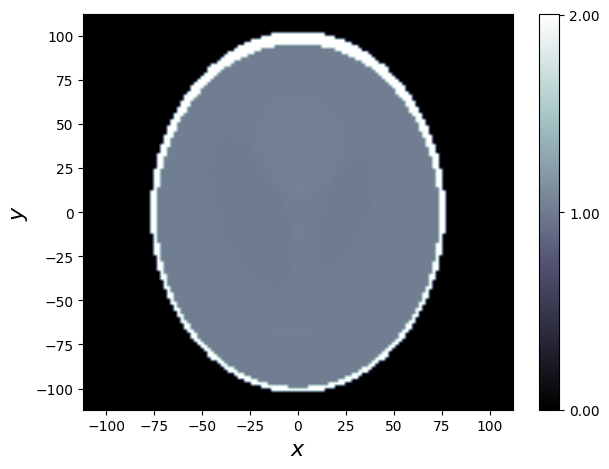

<Figure size 640x480 with 0 Axes>

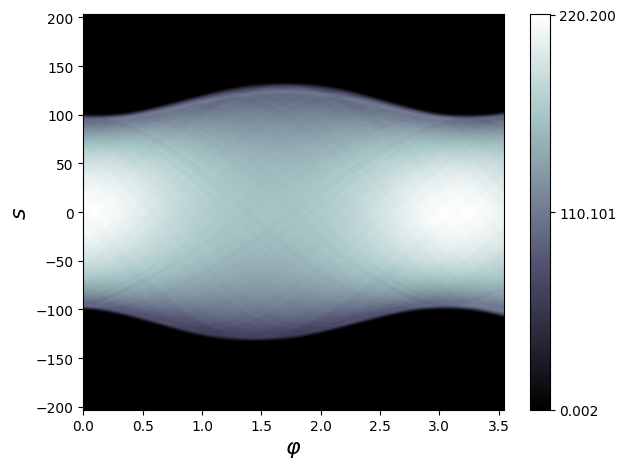

<Figure size 640x480 with 0 Axes>

Suppressor


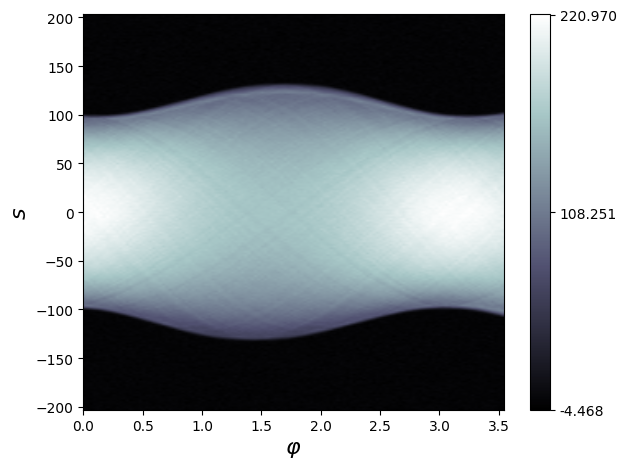

<Figure size 640x480 with 0 Axes>

Suppressor


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import odl
from odl.contrib import tomo

space = odl.uniform_discr([-112,-112],[112,112], 128)

phant = phant = odl.phantom.transmission.shepp_logan(space, modified = False)
phant.show()

max_it = 15000
 
# Construct operator

geo = odl.tomo.cone_beam_geometry(space,780, 220, num_angles=128, short_scan=True)

A = odl.tomo.operators.ray_trafo.RayTransform(space, geo, impl='astra_cuda')

y = A(phant)
y.show()

print("Suppressor")

# Make noisy data

gaussian = odl.phantom.noise.white_noise(A.range, stddev=0.005)
y_n = y + gaussian * y.norm() / (100 * gaussian.norm())

y_n.show()

print("Suppressor")

# Construct Huber functional

# Construct gradient
x_grad = odl.discr.diff_ops.Gradient(space)

eps = 0.1
alpha = 0.1

huber_functional = odl.solvers.functional.default_functionals.Huber(x_grad.range, gamma = eps)

# Combine into variational model

norm_y =  odl.solvers.functional.default_functionals.L2Norm(A.range) 
norm_y2 =  odl.solvers.functional.default_functionals.L2NormSquared(A.range) 

data_fidel = norm_y2.translated(y_n)*A


var_model = 0.5 * odl.solvers.FunctionalProduct(data_fidel,data_fidel) + alpha * huber_functional*x_grad


In [8]:
# alpha = 2.0
eps = 0.002

data_fidel = norm_y2.translated(y_n)*A

y_bad = []
x_bad = []
x_norm = []

alpha_list = np.linspace(1e-4,2,10)

huber_functional = odl.solvers.functional.default_functionals.Huber(x_grad.range, gamma = eps)

for alpha in alpha_list:

    # Combine into variational model
    var_model = 0.5 * data_fidel + alpha * huber_functional*x_grad

    # Minimize variational model using, what?
    x = space.zero()
    odl.solvers.smooth.gradient.adam(var_model, x, maxiter=max_it)
    y_bad.append((A(x)- y).norm()/y.norm())
    x_bad.append((x-phant).norm()/phant.norm())
    x_norm.append(x.norm())



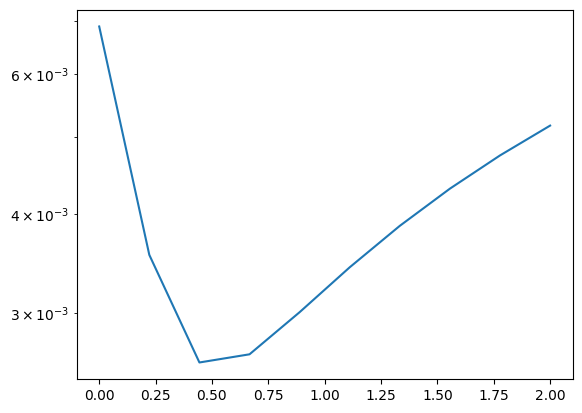

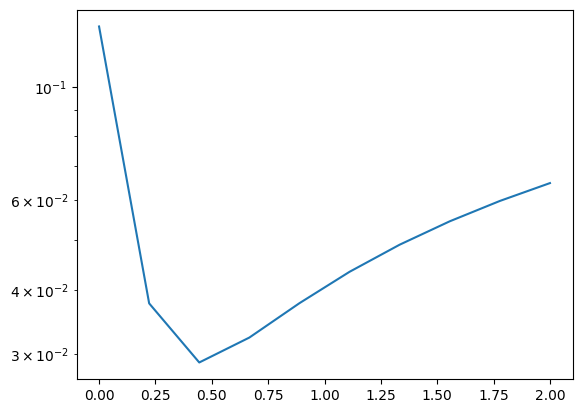

Best with alpha =  0.444522222222


In [10]:
plt.figure()
plt.semilogy(alpha_list,y_bad)
plt.show()

plt.figure()
plt.semilogy(alpha_list,x_bad)
plt.show()

alpha_min = alpha_list[np.argmin(y_bad)]
print("Best with alpha = ", alpha_min)

In [13]:
alpha = alpha_min

y_bad = []
x_bad = []
x_norm = []

eps_list = 10.0**np.array([-4,-3,-2,-1])


for eps in eps_list:
    huber_functional = odl.solvers.functional.default_functionals.Huber(x_grad.range, gamma = eps)

    # Combine into variational model
    var_model = 0.5 * data_fidel + alpha * huber_functional*x_grad

    # Minimize variational model using, what?
    x = space.zero()
    odl.solvers.smooth.gradient.adam(var_model, x, maxiter=max_it)
    y_bad.append((A(x)- y).norm()/y.norm())
    x_bad.append((x-phant).norm()/phant.norm())
    x_norm.append(x.norm())


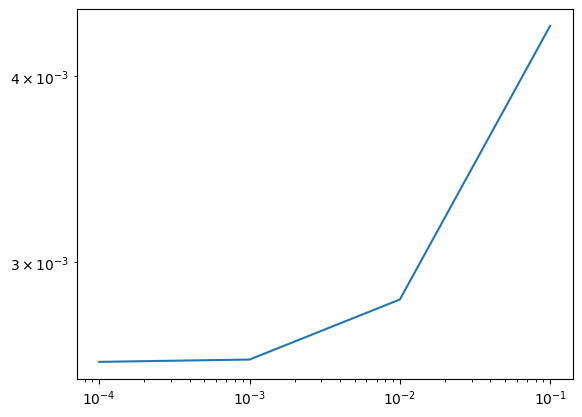

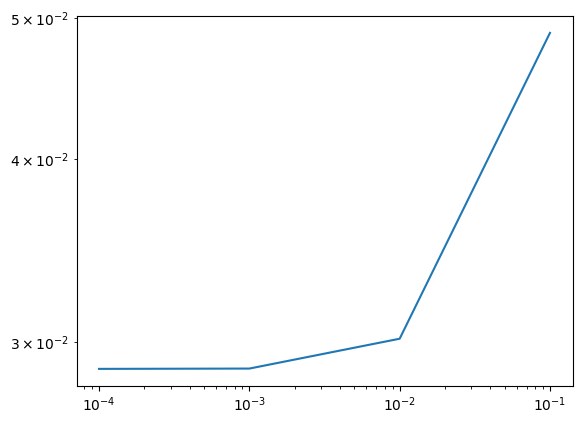

Best with eps =  0.0001


In [15]:
plt.figure()
plt.loglog(eps_list,y_bad)
plt.show()

plt.figure()
plt.loglog(eps_list,x_bad)
plt.show()

eps_min = eps_list[np.argmin(y_bad)]
print("Best with eps = ", eps_min)

In [16]:
# finer search for eps

alpha = alpha_min

y_bad = []
x_bad = []
x_norm = []

eps_list = np.linspace(eps_min/10,2*eps_min, 15)


for eps in eps_list:
    huber_functional = odl.solvers.functional.default_functionals.Huber(x_grad.range, gamma = eps)

    # Combine into variational model
    var_model = 0.5 * data_fidel + alpha * huber_functional*x_grad

    # Minimize variational model using, what?
    x = space.zero()
    odl.solvers.smooth.gradient.adam(var_model, x, maxiter=max_it)
    y_bad.append((A(x)- y).norm()/y.norm())
    x_bad.append((x-phant).norm()/phant.norm())
    x_norm.append(x.norm())


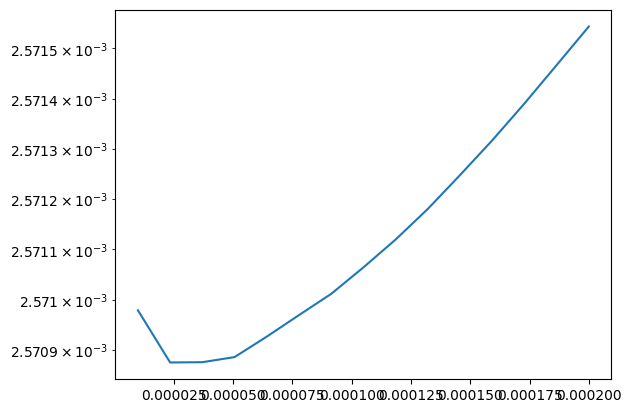

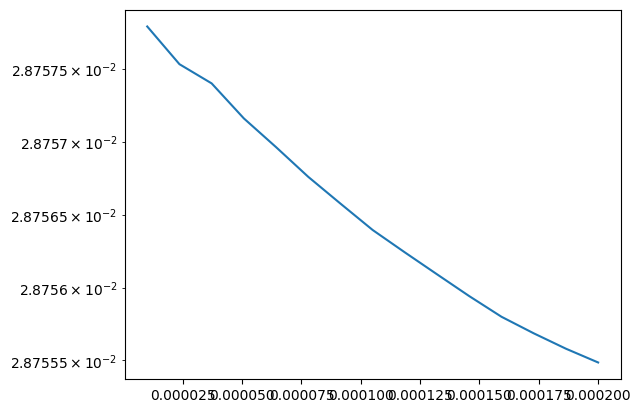

Best with eps =  2.35714285714e-05


In [17]:
plt.figure()
plt.semilogy(eps_list,y_bad)
plt.show()

plt.figure()
plt.semilogy(eps_list,x_bad)
plt.show()

eps_min = eps_list[np.argmin(y_bad)]
print("Best with eps = ", eps_min)

In [19]:
eps = eps_min

y_bad = []
x_bad = []
x_norm = []

alpha_list = np.linspace(alpha_min/4,alpha_min*2,10)

huber_functional = odl.solvers.functional.default_functionals.Huber(x_grad.range, gamma = eps)

max_it = 20000

for alpha in alpha_list:

    # Combine into variational model
    var_model = 0.5 * data_fidel + alpha * huber_functional*x_grad

    # Minimize variational model using, what?
    x = space.zero()
    odl.solvers.smooth.gradient.adam(var_model, x, maxiter=max_it)
    y_bad.append((A(x)- y).norm()/y.norm())
    x_bad.append((x-phant).norm()/phant.norm())
    x_norm.append(x.norm())

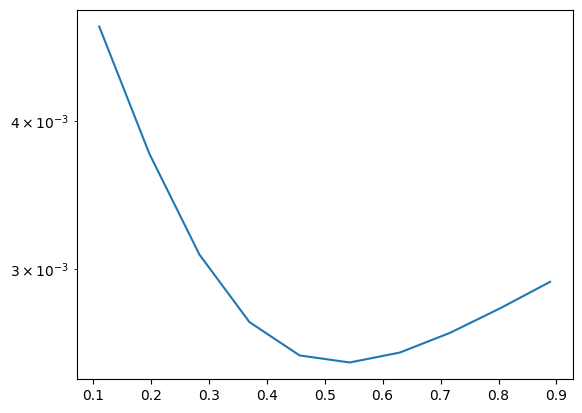

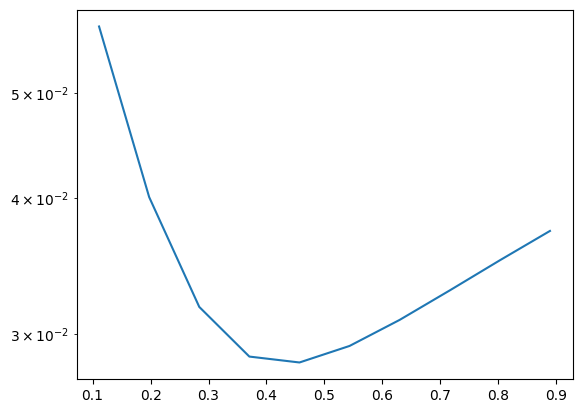

Best with alpha =  0.543304938272


In [20]:
plt.figure()
plt.semilogy(alpha_list,y_bad)
plt.show()

plt.figure()
plt.semilogy(alpha_list,x_bad)
plt.show()

alpha_min = alpha_list[np.argmin(y_bad)]
print("Best with alpha = ", alpha_min)

In [22]:
# finer search for eps

alpha = alpha_min

y_bad = []
x_bad = []
x_norm = []

eps_list = np.linspace(eps_min/2,2*eps_min, 15)


for eps in eps_list:
    huber_functional = odl.solvers.functional.default_functionals.Huber(x_grad.range, gamma = eps)

    # Combine into variational model
    var_model = 0.5 * data_fidel + alpha * huber_functional*x_grad

    # Minimize variational model using, what?
    x = space.zero()
    odl.solvers.smooth.gradient.adam(var_model, x, maxiter=max_it)
    y_bad.append((A(x)- y).norm()/y.norm())
    x_bad.append((x-phant).norm()/phant.norm())
    x_norm.append(x.norm())


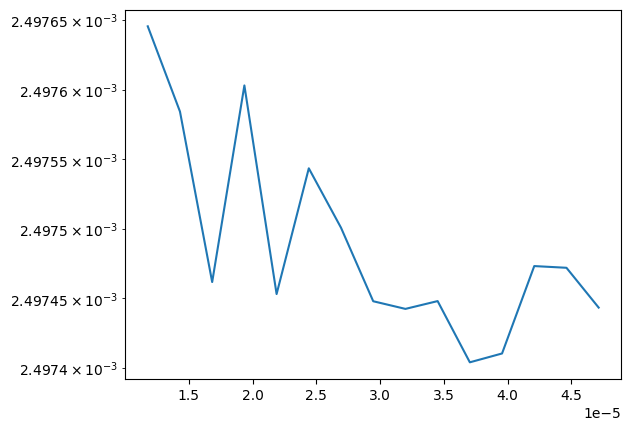

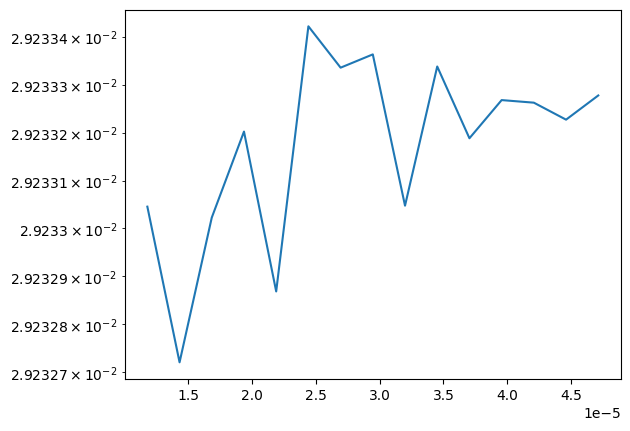

Best with eps =  3.70408163265e-05


In [23]:
plt.figure()
plt.semilogy(eps_list,y_bad)
plt.show()

plt.figure()
plt.semilogy(eps_list,x_bad)
plt.show()

eps_min = eps_list[np.argmin(y_bad)]
print("Best with eps = ", eps_min)

In [25]:
eps = eps_min
alpha = alpha_min

huber_functional = odl.solvers.functional.default_functionals.Huber(x_grad.range, gamma = eps)

# Combine into variational model
var_model = 0.5 * data_fidel + alpha * huber_functional*x_grad

# Minimize variational model using, what?
x = space.zero()
odl.solvers.smooth.gradient.adam(var_model, x, maxiter=2*max_it)

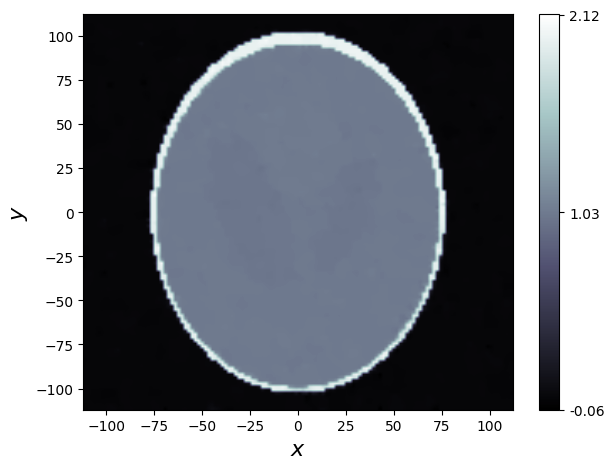

<Figure size 640x480 with 0 Axes>

Relative difference to true  y:  0.0024975850014362405
Relative difference to noisy y:  0.009717642016415416
Relative difference in x:  0.02923359558898616
Final eps:  3.70408163265e-05
Final alpha:  0.543304938272


In [26]:
x.show()

print("Relative difference to true  y: ", (A(x)- y).norm()/y.norm())
print("Relative difference to noisy y: ", (A(x)- y_n).norm()/y.norm())
print("Relative difference in x: ", (x-phant).norm()/phant.norm())

print("Final eps: ", eps)
print("Final alpha: ", alpha)